# Importing Pandas, numpy

In [1]:
import os
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Reading, Sorting and Merging Data

In [2]:
train=pd.read_excel("Quickfreightdata.xlsx",na_values=("?",'#'))

# Understand the Data - - Exploratory Data Analysis (EDA)

In [3]:
train.head()

,ORDER_NBR,EQUIPMENT_TYPE,CUSTOMER_MILES,WEIGHT,ORDER_COST,FIRST_PICK_ZIP,FIRST_PICK_EARLY_APPT,FIRST_PICK_LATE_APPT,LAST_DELIVERY_ZIP,LAST_DELIVERY_EARLY_APPT,LAST_DELIVERY_LATE_APPT,IS_HAZARDOUS,CREATED_DATE
0,535361133,53 FLATBED,802,42000,0.00,21224,2015-07-13 07:30:00,2015-07-13 15:00:00,62707,2015-07-14 08:00:00,2015-07-14 16:00:00,N,2015-07-01 10:22:00
1,1499443993,V,0,40500,875.00,L1W 3H9,2015-07-06 14:00:00,2015-07-06 14:00:00,13619,2015-07-07 07:00:00,2015-07-07 16:00:00,N,2015-07-02 10:37:00
2,1058279607,NaN,774,0,88.14,46037,2015-07-01 08:00:00,2015-07-02 17:00:00,73107,2015-07-07 08:00:00,2015-07-07 17:00:00,N,2015-07-01 15:05:00
3,2093496262,V,0,40500,875.00,L1W 3H9,2015-07-07 14:00:00,2015-07-07 14:00:00,13619,2015-07-08 07:00:00,2015-07-08 16:00:00,N,2015-07-02 10:38:00
4,2373724838,V,0,40500,875.00,L1W 3H9,2015-07-08 14:00:00,2015-07-08 14:00:00,13619,2015-07-09 07:00:00,2015-07-09 16:00:00,N,2015-07-02 11:16:00


In [4]:
train.tail()

,ORDER_NBR,EQUIPMENT_TYPE,CUSTOMER_MILES,WEIGHT,ORDER_COST,FIRST_PICK_ZIP,FIRST_PICK_EARLY_APPT,FIRST_PICK_LATE_APPT,LAST_DELIVERY_ZIP,LAST_DELIVERY_EARLY_APPT,LAST_DELIVERY_LATE_APPT,IS_HAZARDOUS,CREATED_DATE
18734,675767319,R,707,26405,1500.0,84104,2015-09-01 11:00:00,2015-09-01 18:00:00,85353,2015-09-03 08:30:00,2015-09-03 08:30:00,N,2015-08-28 17:19:00
18735,2597037520,R,1230,42500,0.0,84088,2015-08-31 20:00:00,2015-08-31 20:00:00,76102,2015-09-03 13:00:00,2015-09-03 13:00:00,N,2015-08-28 17:22:00
18736,1272142564,R,1924,42000,2500.0,78521,2015-09-04 09:00:00,2015-09-04 17:00:00,95380,2015-09-07 07:00:00,2015-09-07 07:00:00,N,2015-09-03 08:31:00
18737,830532830,R,2185,40000,5300.0,4915,2015-09-03 14:30:00,2015-09-03 14:30:00,29209,2015-09-07 06:00:00,2015-09-07 06:00:00,N,2015-09-03 13:08:00
18738,1119673825,R,2185,40000,5300.0,4915,2015-09-03 14:30:00,2015-09-03 14:30:00,30336,2015-09-07 13:00:00,2015-09-07 13:00:00,N,2015-09-03 13:08:00


In [5]:
train.shape

(18739, 13)

In [6]:
train.isna().sum()

ORDER_NBR                      0
EQUIPMENT_TYPE              1011
CUSTOMER_MILES                 0
WEIGHT                         0
ORDER_COST                     6
FIRST_PICK_ZIP                 0
FIRST_PICK_EARLY_APPT        260
FIRST_PICK_LATE_APPT         304
LAST_DELIVERY_ZIP              0
LAST_DELIVERY_EARLY_APPT     329
LAST_DELIVERY_LATE_APPT      386
IS_HAZARDOUS                   0
CREATED_DATE                   0
dtype: int64

In [7]:
train.dtypes

ORDER_NBR                            int64
EQUIPMENT_TYPE                      object
CUSTOMER_MILES                       int64
WEIGHT                               int64
ORDER_COST                         float64
FIRST_PICK_ZIP                      object
FIRST_PICK_EARLY_APPT       datetime64[ns]
FIRST_PICK_LATE_APPT        datetime64[ns]
LAST_DELIVERY_ZIP                   object
LAST_DELIVERY_EARLY_APPT    datetime64[ns]
LAST_DELIVERY_LATE_APPT     datetime64[ns]
IS_HAZARDOUS                        object
CREATED_DATE                datetime64[ns]
dtype: object

In [8]:
train.nunique()

ORDER_NBR                   18739
EQUIPMENT_TYPE                 28
CUSTOMER_MILES               1411
WEIGHT                       2678
ORDER_COST                    758
FIRST_PICK_ZIP                842
FIRST_PICK_EARLY_APPT        3090
FIRST_PICK_LATE_APPT         3155
LAST_DELIVERY_ZIP            1843
LAST_DELIVERY_EARLY_APPT     3699
LAST_DELIVERY_LATE_APPT      3874
IS_HAZARDOUS                    2
CREATED_DATE                12181
dtype: int64

In [9]:
train.ORDER_COST.value_counts()

0.00       3527
600.00     1011
700.00      674
500.00      634
1000.00     595
           ... 
122.32        1
473.87        1
223.81        1
77.48         1
2280.00       1
Name: ORDER_COST, Length: 758, dtype: int64

In [10]:
train.IS_HAZARDOUS.value_counts()

N    18521
Y      218
Name: IS_HAZARDOUS, dtype: int64

In [11]:
train['Days']=abs((train['LAST_DELIVERY_LATE_APPT']-train['FIRST_PICK_EARLY_APPT']).dt.days)

In [12]:
train.head()

,ORDER_NBR,EQUIPMENT_TYPE,CUSTOMER_MILES,WEIGHT,ORDER_COST,FIRST_PICK_ZIP,FIRST_PICK_EARLY_APPT,FIRST_PICK_LATE_APPT,LAST_DELIVERY_ZIP,LAST_DELIVERY_EARLY_APPT,LAST_DELIVERY_LATE_APPT,IS_HAZARDOUS,CREATED_DATE,Days
0,535361133,53 FLATBED,802,42000,0.00,21224,2015-07-13 07:30:00,2015-07-13 15:00:00,62707,2015-07-14 08:00:00,2015-07-14 16:00:00,N,2015-07-01 10:22:00,1.0
1,1499443993,V,0,40500,875.00,L1W 3H9,2015-07-06 14:00:00,2015-07-06 14:00:00,13619,2015-07-07 07:00:00,2015-07-07 16:00:00,N,2015-07-02 10:37:00,1.0
2,1058279607,NaN,774,0,88.14,46037,2015-07-01 08:00:00,2015-07-02 17:00:00,73107,2015-07-07 08:00:00,2015-07-07 17:00:00,N,2015-07-01 15:05:00,6.0
3,2093496262,V,0,40500,875.00,L1W 3H9,2015-07-07 14:00:00,2015-07-07 14:00:00,13619,2015-07-08 07:00:00,2015-07-08 16:00:00,N,2015-07-02 10:38:00,1.0
4,2373724838,V,0,40500,875.00,L1W 3H9,2015-07-08 14:00:00,2015-07-08 14:00:00,13619,2015-07-09 07:00:00,2015-07-09 16:00:00,N,2015-07-02 11:16:00,1.0


In [13]:
train.shape

(18739, 14)

In [14]:
train.head()

,ORDER_NBR,EQUIPMENT_TYPE,CUSTOMER_MILES,WEIGHT,ORDER_COST,FIRST_PICK_ZIP,FIRST_PICK_EARLY_APPT,FIRST_PICK_LATE_APPT,LAST_DELIVERY_ZIP,LAST_DELIVERY_EARLY_APPT,LAST_DELIVERY_LATE_APPT,IS_HAZARDOUS,CREATED_DATE,Days
0,535361133,53 FLATBED,802,42000,0.00,21224,2015-07-13 07:30:00,2015-07-13 15:00:00,62707,2015-07-14 08:00:00,2015-07-14 16:00:00,N,2015-07-01 10:22:00,1.0
1,1499443993,V,0,40500,875.00,L1W 3H9,2015-07-06 14:00:00,2015-07-06 14:00:00,13619,2015-07-07 07:00:00,2015-07-07 16:00:00,N,2015-07-02 10:37:00,1.0
2,1058279607,NaN,774,0,88.14,46037,2015-07-01 08:00:00,2015-07-02 17:00:00,73107,2015-07-07 08:00:00,2015-07-07 17:00:00,N,2015-07-01 15:05:00,6.0
3,2093496262,V,0,40500,875.00,L1W 3H9,2015-07-07 14:00:00,2015-07-07 14:00:00,13619,2015-07-08 07:00:00,2015-07-08 16:00:00,N,2015-07-02 10:38:00,1.0
4,2373724838,V,0,40500,875.00,L1W 3H9,2015-07-08 14:00:00,2015-07-08 14:00:00,13619,2015-07-09 07:00:00,2015-07-09 16:00:00,N,2015-07-02 11:16:00,1.0


In [15]:
train.drop(['ORDER_NBR','LAST_DELIVERY_EARLY_APPT','LAST_DELIVERY_LATE_APPT','FIRST_PICK_LATE_APPT','FIRST_PICK_EARLY_APPT'],axis=1,inplace=True)

In [16]:
train.head()

,EQUIPMENT_TYPE,CUSTOMER_MILES,WEIGHT,ORDER_COST,FIRST_PICK_ZIP,LAST_DELIVERY_ZIP,IS_HAZARDOUS,CREATED_DATE,Days
0,53 FLATBED,802,42000,0.00,21224,62707,N,2015-07-01 10:22:00,1.0
1,V,0,40500,875.00,L1W 3H9,13619,N,2015-07-02 10:37:00,1.0
2,NaN,774,0,88.14,46037,73107,N,2015-07-01 15:05:00,6.0
3,V,0,40500,875.00,L1W 3H9,13619,N,2015-07-02 10:38:00,1.0
4,V,0,40500,875.00,L1W 3H9,13619,N,2015-07-02 11:16:00,1.0


In [17]:
train.dtypes

EQUIPMENT_TYPE               object
CUSTOMER_MILES                int64
WEIGHT                        int64
ORDER_COST                  float64
FIRST_PICK_ZIP               object
LAST_DELIVERY_ZIP            object
IS_HAZARDOUS                 object
CREATED_DATE         datetime64[ns]
Days                        float64
dtype: object

In [18]:
num_cols=['CUSTOMER_MILES','WEIGHT',"Days"]
cat_cols=['IS_HAZARDOUS','EQUIPMENT_TYPE','FIRST_PICK_ZIP','LAST_DELIVERY_ZIP']

In [19]:
train[cat_cols]=train[cat_cols].astype('category')

In [20]:
train.dtypes

EQUIPMENT_TYPE             category
CUSTOMER_MILES                int64
WEIGHT                        int64
ORDER_COST                  float64
FIRST_PICK_ZIP             category
LAST_DELIVERY_ZIP          category
IS_HAZARDOUS               category
CREATED_DATE         datetime64[ns]
Days                        float64
dtype: object

In [21]:
train.dropna(subset=['ORDER_COST'], inplace=True)

In [22]:
train.isna().sum()

EQUIPMENT_TYPE       1006
CUSTOMER_MILES          0
WEIGHT                  0
ORDER_COST              0
FIRST_PICK_ZIP          0
LAST_DELIVERY_ZIP       0
IS_HAZARDOUS            0
CREATED_DATE            0
Days                  387
dtype: int64

In [23]:
import matplotlib.pyplot as plt

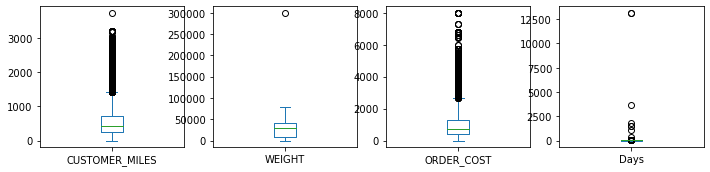

In [24]:
train.plot(kind='box', subplots =True , sharex=False, sharey=False, layout=(5,5), figsize=(15,15))
plt.show()

In [25]:
Q1 = train[num_cols].quantile(0.25)
Q3 = train[num_cols].quantile(0.75)
IQR = Q3 - Q1

In [26]:
upp_bou = (Q3 + 1.5*IQR)
low_bou = (Q1-1.5*IQR)

In [27]:
upp_bou

CUSTOMER_MILES     1409.0
WEIGHT            93000.0
Days                  2.5
dtype: float64

In [28]:
low_bou

CUSTOMER_MILES     -439.0
WEIGHT           -43000.0
Days                 -1.5
dtype: float64

In [29]:
for i in num_cols:
    m=0
    k=0
    for j in train[i]:
        if j>upp_bou[i]:
            m=m+1
        elif j<low_bou[i]:
            k=k+1
    print(m)
    print(k)

1304
0
1
0
2457
0


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
y=train.drop(['EQUIPMENT_TYPE','CUSTOMER_MILES','WEIGHT','FIRST_PICK_ZIP','LAST_DELIVERY_ZIP','IS_HAZARDOUS','CREATED_DATE','Days'],axis=1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['ORDER_COST'],axis=1),train['ORDER_COST'] , test_size = 0.3, random_state = 123)

In [33]:
X_train.dtypes

EQUIPMENT_TYPE             category
CUSTOMER_MILES                int64
WEIGHT                        int64
FIRST_PICK_ZIP             category
LAST_DELIVERY_ZIP          category
IS_HAZARDOUS               category
CREATED_DATE         datetime64[ns]
Days                        float64
dtype: object

In [34]:
y.head()

,ORDER_COST
0,0.00
1,875.00
2,88.14
3,875.00
4,875.00


In [35]:
from sklearn.impute import SimpleImputer

In [36]:
df_num_train = X_train[num_cols]
df_num_test = X_test[num_cols]

In [37]:
num_imputer = SimpleImputer(strategy='mean')
num_imputer.fit(df_num_train[num_cols])

SimpleImputer()

In [38]:
df_num_train = pd.DataFrame (num_imputer.transform(df_num_train), columns= num_cols)

In [39]:
df_num_test =  pd.DataFrame(num_imputer.transform(df_num_test), columns=num_cols)

In [40]:
df_cat_train = X_train[cat_cols]
df_cat_test = X_test[cat_cols]

In [41]:
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_imputer.fit(df_cat_train)

SimpleImputer(strategy='most_frequent')

In [42]:
df_cat_train = pd.DataFrame(cat_imputer.transform(df_cat_train), columns=cat_cols)

In [43]:
df_cat_test = pd.DataFrame(cat_imputer.transform(df_cat_test), columns=cat_cols)

In [44]:
X_train = pd.concat([df_num_train, df_cat_train], axis = 1)


X_test = pd.concat([df_num_test, df_cat_test], axis = 1)

In [45]:
X_train.shape

(13113, 7)

In [46]:
X_test.shape

(5620, 7)

In [47]:
X_train.head()

,CUSTOMER_MILES,WEIGHT,Days,IS_HAZARDOUS,EQUIPMENT_TYPE,FIRST_PICK_ZIP,LAST_DELIVERY_ZIP
0,463.0,43902.0,1.0,N,VR,15650,06320-6411
1,158.0,43900.0,0.0,N,VR,54601,55413
2,323.0,8000.0,0.0,N,V,50010,53094
3,195.0,8000.0,0.0,N,V,50010,56003
4,118.0,20000.0,0.0,N,V,29016,29650


In [48]:
X_test.head()

,CUSTOMER_MILES,WEIGHT,Days,IS_HAZARDOUS,EQUIPMENT_TYPE,FIRST_PICK_ZIP,LAST_DELIVERY_ZIP
0,296.0,11649.0,0.0,N,V,60421,45215
1,1335.0,40256.0,1.0,N,V,76155,21701
2,235.0,17884.0,0.0,N,V,62305,61832
3,0.0,42000.0,1.0,N,V,H9R 5W3,18106
4,852.0,12459.0,1.0,N,V,47805,14086


In [49]:
df=pd.concat([X_train, X_test], axis=0)

In [50]:
Vdata = df.reset_index(drop=True)

In [51]:
Vdata.isna().sum()

CUSTOMER_MILES       0
WEIGHT               0
Days                 0
IS_HAZARDOUS         0
EQUIPMENT_TYPE       0
FIRST_PICK_ZIP       0
LAST_DELIVERY_ZIP    0
dtype: int64

In [52]:
Vdata.head()

,CUSTOMER_MILES,WEIGHT,Days,IS_HAZARDOUS,EQUIPMENT_TYPE,FIRST_PICK_ZIP,LAST_DELIVERY_ZIP
0,463.0,43902.0,1.0,N,VR,15650,06320-6411
1,158.0,43900.0,0.0,N,VR,54601,55413
2,323.0,8000.0,0.0,N,V,50010,53094
3,195.0,8000.0,0.0,N,V,50010,56003
4,118.0,20000.0,0.0,N,V,29016,29650


In [53]:
y.head()

,ORDER_COST
0,0.00
1,875.00
2,88.14
3,875.00
4,875.00


In [54]:
Vdata = pd.concat([Vdata, y], axis=1)

In [55]:
Vdata.head()

,CUSTOMER_MILES,WEIGHT,Days,IS_HAZARDOUS,EQUIPMENT_TYPE,FIRST_PICK_ZIP,LAST_DELIVERY_ZIP,ORDER_COST
0,463.0,43902.0,1.0,N,VR,15650,06320-6411,0.00
1,158.0,43900.0,0.0,N,VR,54601,55413,875.00
2,323.0,8000.0,0.0,N,V,50010,53094,88.14
3,195.0,8000.0,0.0,N,V,50010,56003,875.00
4,118.0,20000.0,0.0,N,V,29016,29650,875.00


In [56]:
Vdata.shape

(18739, 8)

In [57]:
Vdata.describe()

,CUSTOMER_MILES,WEIGHT,Days,ORDER_COST
count,18733.000000,18733.000000,18733.000000,18733.000000
mean,588.230129,25219.295254,3.077812,954.230941
std,512.017845,16310.085569,140.161339,938.818390
min,0.000000,0.000000,0.000000,0.000000
25%,254.000000,8000.000000,0.000000,400.000000
50%,436.000000,28192.000000,1.000000,700.000000
75%,716.000000,42000.000000,2.000000,1300.000000
max,3733.000000,300000.000000,13150.000000,8000.000000


# 1.How is the shipment cost distributed? 

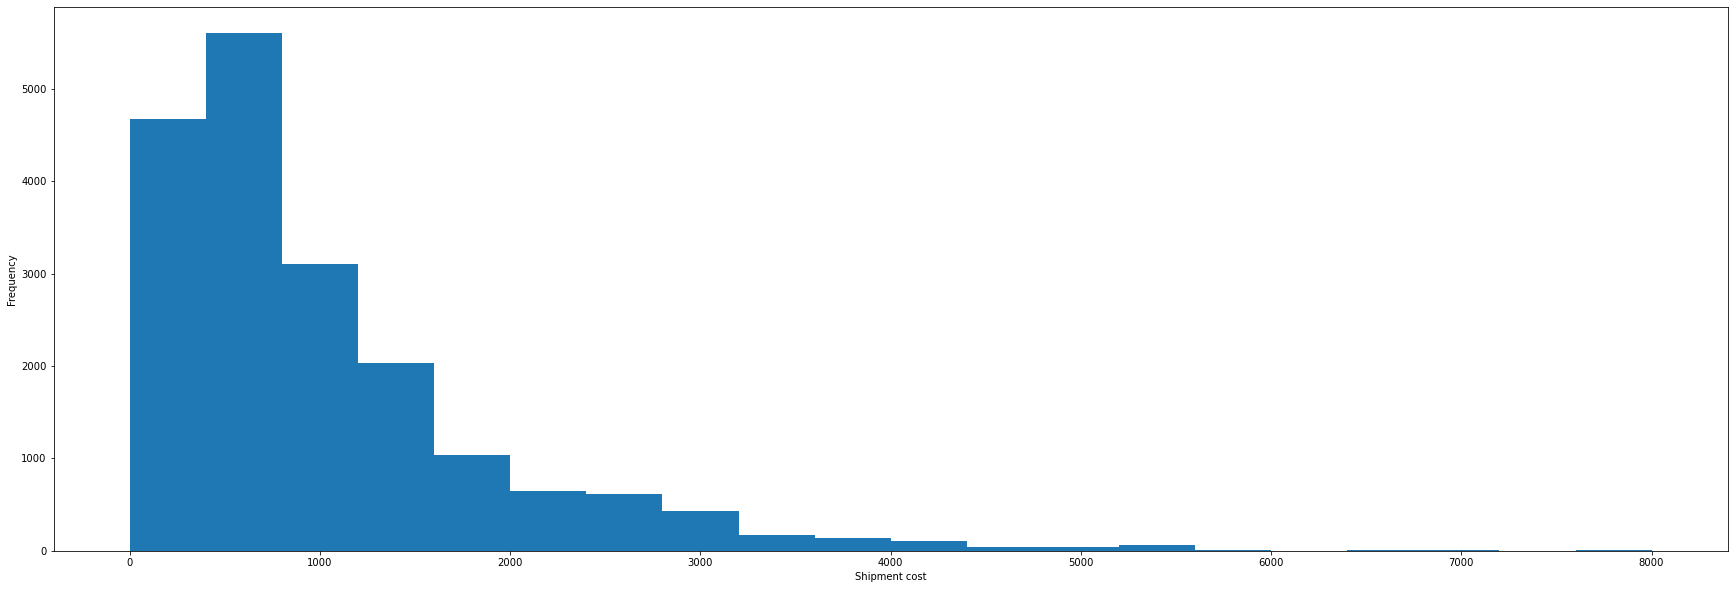

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
plt.hist(Vdata['ORDER_COST'], bins=20)
plt.xlabel('Shipment cost')
plt.ylabel('Frequency')
plt.show()

--> from the plot we can see that most of the product order_cost is in between 0 to 1000

# 2. Does the shipment cost depend on the distance?


In [59]:
Vdata['ORDER_COST'].shape

(18739,)

In [60]:
Vdata['CUSTOMER_MILES'].shape

(18739,)

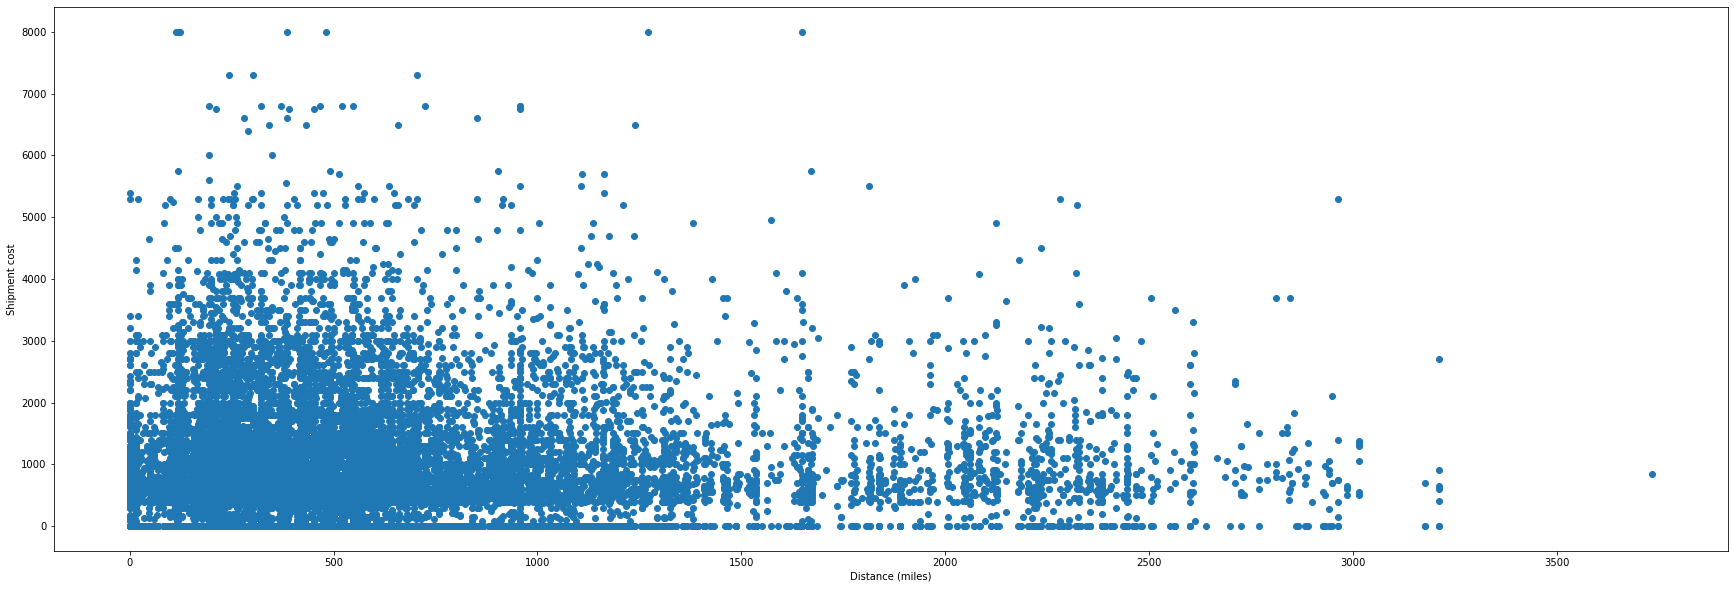

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
plt.scatter(Vdata['CUSTOMER_MILES'], Vdata['ORDER_COST'])
plt.xlabel('Distance (miles)')
plt.ylabel('Shipment cost')
plt.show()

-->the shipment cost is not always depends on the distance but it may depends on the product and distance.

# 3. Is the weight of the shipment an important predictor to decide the shipment cost?

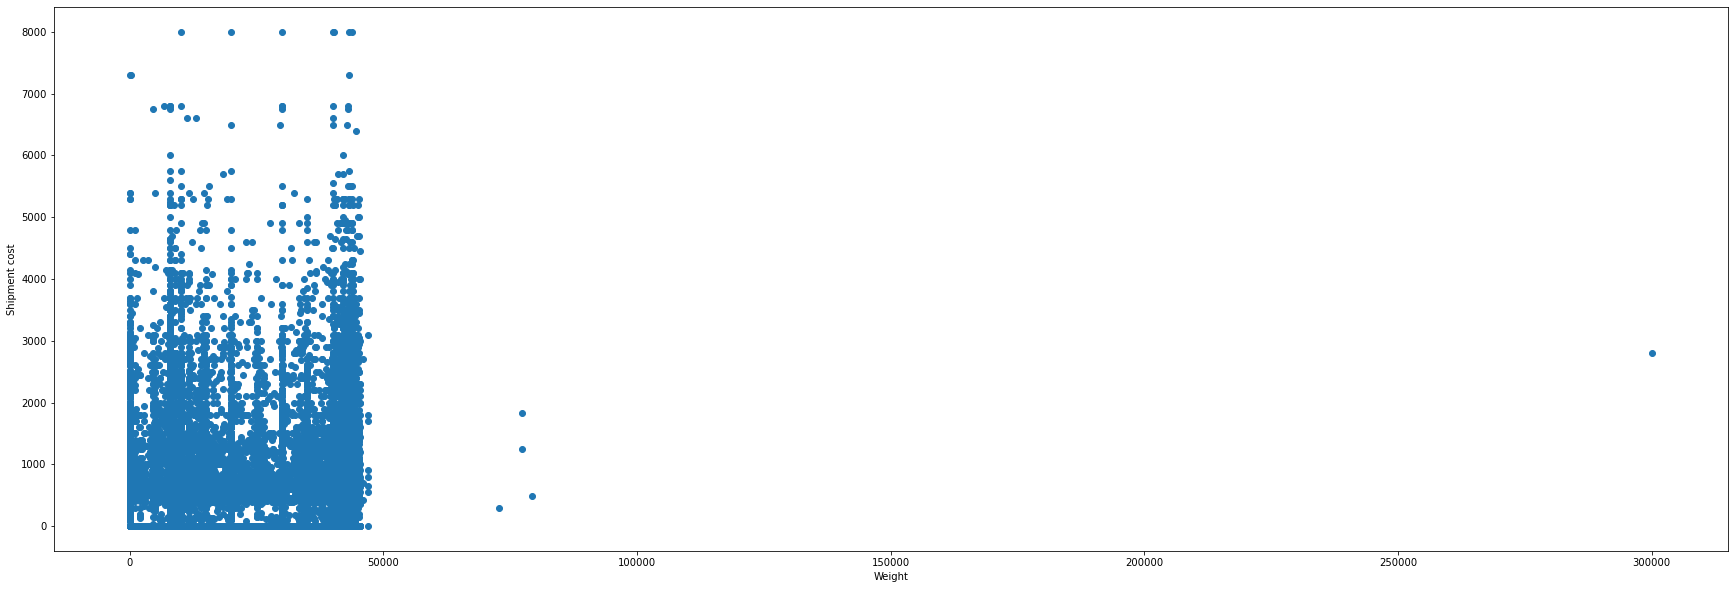

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
plt.scatter(Vdata['WEIGHT'], Vdata['ORDER_COST'])
plt.xlabel('Weight')
plt.ylabel('Shipment cost')
plt.show()

-->according to the plot the shipment cost is not always depends on weight of the product 
   or everytime weight of the product will not impact on shipmentcost.

# 4. Is the Shipment cost varying depending on the source and destinations? 

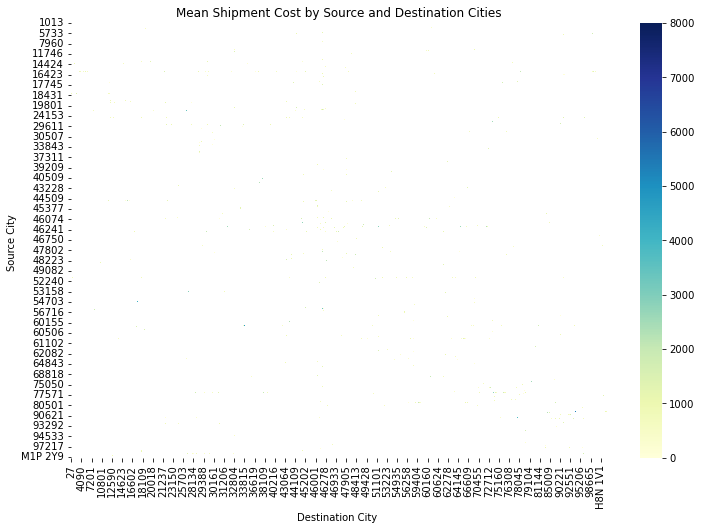

In [63]:
import seaborn as sns

# Pivot table of mean shipment cost by source and destination cities
table = Vdata.pivot_table(values='ORDER_COST', index='FIRST_PICK_ZIP', columns='LAST_DELIVERY_ZIP', aggfunc='mean')

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(table, cmap='YlGnBu')
plt.title('Mean Shipment Cost by Source and Destination Cities')
plt.xlabel('Destination City ')
plt.ylabel('Source City ')
plt.show()

-->it is same like distance and also based on place,the shipment cost is not always depends on the distance but it may depends on the product and place or distance.

# 5. How do you justify whether the cost varies depending on the whether the item is hazardous or not

In [64]:
from scipy.stats import ttest_ind

hazardous = Vdata[Vdata['IS_HAZARDOUS'] == 'Y']['ORDER_COST'].dropna()
non_hazardous = Vdata[Vdata['IS_HAZARDOUS'] == 'N']['ORDER_COST'].dropna()

t_stat, p_val = ttest_ind(hazardous, non_hazardous)
print('t-statistic:', t_stat)
print('p-value:', p_val)

t-statistic: -1.4959620333685508
p-value: 0.13468040250356006


In [65]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [66]:
X_test[cat_cols].dtypes

IS_HAZARDOUS         object
EQUIPMENT_TYPE       object
FIRST_PICK_ZIP       object
LAST_DELIVERY_ZIP    object
dtype: object

# Standardizing for numerical data

In [67]:
std = StandardScaler()

In [68]:

x_train_num = pd.DataFrame(std.fit_transform(X_train[num_cols]), columns=X_train[num_cols].columns)
x_test_num = pd.DataFrame(std.transform(X_test[num_cols]), columns=X_test[num_cols].columns)

In [69]:
x_train_num.head()

,CUSTOMER_MILES,WEIGHT,Days
0,-0.241620,1.145271,-0.015334
1,-0.834760,1.145149,-0.023534
2,-0.513881,-1.056711,-0.023534
3,-0.762805,-1.056711,-0.023534
4,-0.912549,-0.320713,-0.023534


# One hot encoding for categorical values

In [70]:
ohe = OneHotEncoder(handle_unknown="ignore",drop=None)

In [71]:
X_train[cat_cols].dtypes
X_test[cat_cols].dtypes

IS_HAZARDOUS         object
EQUIPMENT_TYPE       object
FIRST_PICK_ZIP       object
LAST_DELIVERY_ZIP    object
dtype: object

In [72]:
m=X_test[cat_cols]
k=X_train[cat_cols]
m=m.astype(str)
k=k.astype(str)
m.shape


(5620, 4)

In [73]:
k.shape

(13113, 4)

In [74]:
x_train_cat = pd.DataFrame(ohe.fit_transform(k).todense(), columns=ohe.get_feature_names_out())
x_test_cat = pd.DataFrame(ohe.transform(m).todense(), columns=ohe.get_feature_names_out())
print(x_train_cat.shape)
print(x_test_cat.shape)

(13113, 2381)
(5620, 2381)


In [75]:
Train = pd.concat([x_train_num, x_train_cat], axis=1)

In [76]:
Test = pd.concat([x_test_num, x_test_cat], axis=1)

In [77]:
Train.head()

,CUSTOMER_MILES,WEIGHT,Days,IS_HAZARDOUS_N,IS_HAZARDOUS_Y,EQUIPMENT_TYPE_53 FLATBED,EQUIPMENT_TYPE_D-LTL,EQUIPMENT_TYPE_DRAY,EQUIPMENT_TYPE_DROP,EQUIPMENT_TYPE_F,...,LAST_DELIVERY_ZIP_N1H6H9,LAST_DELIVERY_ZIP_R3C2E6,LAST_DELIVERY_ZIP_T2C4T6,LAST_DELIVERY_ZIP_V0X 1L0,LAST_DELIVERY_ZIP_V3M6E7,LAST_DELIVERY_ZIP_V3R 7A2,LAST_DELIVERY_ZIP_V3V4G1,LAST_DELIVERY_ZIP_V4G 1L1,LAST_DELIVERY_ZIP_V4W3Z1,LAST_DELIVERY_ZIP_V5P 2S8
0,-0.241620,1.145271,-0.015334,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.834760,1.145149,-0.023534,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.513881,-1.056711,-0.023534,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.762805,-1.056711,-0.023534,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.912549,-0.320713,-0.023534,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
Train.shape

(13113, 2384)

In [79]:
Test.shape

(5620, 2384)

# 1. Descion tree

In [80]:
from sklearn.tree import DecisionTreeRegressor
dtclf = DecisionTreeRegressor(max_depth=8,criterion='squared_error',splitter='best')

In [81]:
dtclf.fit(Train, y_train)

DecisionTreeRegressor(max_depth=8)

In [82]:
pred_train_dt = dtclf.predict(Train)
pred_validation_dt = dtclf.predict(Test)

In [83]:
from sklearn.metrics import mean_squared_error, r2_score

In [84]:
Tr_DR_mse = round(mean_squared_error(y_train,pred_train_dt,squared= False),2)
Tr_DR_r2 = round(r2_score(y_train, pred_train_dt),2)

In [85]:
print(Tr_DR_mse)
print(Tr_DR_r2)

457.51
0.76


In [86]:
va_DR_mse = round(mean_squared_error(y_test,pred_validation_dt,squared= False),2)
va_DR_r2 = round(r2_score(y_test, pred_validation_dt),2)


In [87]:
print(va_DR_mse)
print(va_DR_r2)

518.27
0.69


# 2. KNN

In [88]:
from sklearn.neighbors import KNeighborsRegressor

In [89]:
knn=KNeighborsRegressor(n_neighbors=7)

In [90]:
knn.fit(Train, y_train)


KNeighborsRegressor(n_neighbors=7)

In [91]:
pred_train_knn = knn.predict(Train)
pred_validation_knn = knn.predict(Test)

In [92]:
Tr_knn_mse = round(mean_squared_error(y_train,pred_train_knn,squared= False),2)
Tr_knn_r2 = round(r2_score(y_train, pred_train_knn),2)

In [93]:
print(Tr_knn_mse)
print(Tr_knn_r2)

413.16
0.81


In [94]:
va_knn_mse = round(mean_squared_error(y_test,pred_validation_knn,squared= False),2)
va_knn_r2 = round(r2_score(y_test, pred_validation_knn),2)


In [95]:
print(va_knn_mse)
print(va_knn_r2)

482.01
0.74


# 3. Linear Regression

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
model = LinearRegression()

In [98]:
model.fit(Train, y_train) 

LinearRegression()

In [99]:
pred_train_LR = model.predict(Train)
pred_validation_LR= model.predict(Test)

In [100]:
Tr_LR_mse = round(mean_squared_error(y_train,pred_train_LR,squared= False),2)
Tr_LR_r2 = round(r2_score(y_train, pred_train_LR),2)

In [101]:
print(Tr_LR_mse)
print(Tr_LR_r2)

409.77
0.81


In [102]:
va_LR_mse = round(mean_squared_error(y_test,pred_validation_LR,squared= False),2)
va_LR_r2 = round(r2_score(y_test, pred_validation_LR),2)


In [103]:
print(va_LR_mse)
print(va_LR_r2)

26575089213659.0
-8.036714015715158e+20


# 4. Random Forest

In [104]:
from sklearn.ensemble import RandomForestRegressor

model1 = RandomForestRegressor(n_estimators=30, random_state=0)
model1.fit(Train, y_train)
pred_train_model1 = model1.predict(Train)
pred_validation_model1= model1.predict(Test)

In [105]:
Tr_RF_mse = round(mean_squared_error(y_train,pred_train_model1,squared= False),2)
Tr_RF_r2 = round(r2_score(y_train, pred_train_model1),2)

In [106]:
print(Tr_RF_mse)
print(Tr_RF_r2)

250.88
0.93


In [107]:
va_RF_mse = round(mean_squared_error(y_test,pred_validation_model1,squared= False),2)
va_RF_r2 = round(r2_score(y_test, pred_validation_model1),2)

In [108]:
print(va_RF_mse)
print(va_RF_r2)

445.03
0.77


# 5.Stacking Regressor


In [109]:
from sklearn.ensemble import StackingRegressor

In [110]:
estimators=[('dtclf',dtclf),('knn=(n_neighbors=7)',knn),]

In [111]:
stack_model = StackingRegressor( estimators = estimators,final_estimator = model)

In [112]:
stack_model.fit(Train,y_train)

StackingRegressor(estimators=[('dtclf', DecisionTreeRegressor(max_depth=8)),
                              ('knn=(n_neighbors=7)',
                               KNeighborsRegressor(n_neighbors=7))],
                  final_estimator=LinearRegression())

In [113]:
trStack_pred=stack_model.predict(Train)

In [114]:
teStack_pred=stack_model.predict(Test)

In [115]:
tr_ST_mse = round(mean_squared_error(y_train,trStack_pred,squared= False),2)
tr_STr2 = round(r2_score(y_train,trStack_pred ),2)


In [116]:
print(tr_ST_mse)
print(tr_STr2)

395.87
0.82


In [117]:
va_ST_mse =round(mean_squared_error(y_test,teStack_pred,squared= False),2)
va_ST_r2 = round(r2_score(y_test,teStack_pred ),2)

In [118]:
print(va_ST_mse)
print(va_ST_r2)


464.42
0.75


In [119]:
Results=[[1,'','Decision Tree','',Tr_DR_mse,'',Tr_DR_r2,'',va_DR_mse,'',va_DR_r2],[2,'','KNN','',Tr_knn_mse,'',Tr_knn_r2,'',va_knn_mse,'',va_knn_r2],[3,'','Linear Regression','',Tr_LR_mse,'',Tr_LR_r2,'',va_LR_mse,'',va_LR_r2],[4,'','Random Forest','',Tr_RF_mse,'',Tr_RF_r2,'',va_RF_mse,'',va_RF_r2],[5,'','Stacking','',tr_ST_mse,'',tr_STr2,'',va_ST_mse,'',va_ST_r2]]

In [120]:
Results_data=pd.DataFrame(Results,columns=['S.NO','','Model Name','','Train_RMSE','','Train_R2','','Test_RMSE','','Test_r2'])



In [121]:
Results_data.set_index("S.NO", inplace = True)

In [122]:
Results_data


,,Model Name,,Train_RMSE,,Train_R2,,Test_RMSE,,Test_r2
S.NO,,,,,,,,,,
1,,Decision Tree,,457.51,,0.76,,5.182700e+02,,6.900000e-01
2,,KNN,,413.16,,0.81,,4.820100e+02,,7.400000e-01
3,,Linear Regression,,409.77,,0.81,,2.657509e+13,,-8.036714e+20
4,,Random Forest,,250.88,,0.93,,4.450300e+02,,7.700000e-01
5,,Stacking,,395.87,,0.82,,4.644200e+02,,7.500000e-01
